<table style="width: 100%">
    <tr style="background: #ffffff">
        <td style="padding-top:25px;width: 180px"><img src="https://mci.edu/templates/mci/images/logo.svg" alt="Logo"></td>
        <td style="width: 100%">
            <div style="text-align:right; width: 100%; text-align:right"><font style="font-size:38px"><b>Visualisierung und Datenbanken</b></font></div>
            <div style="padding-top:0px; width: 100%; text-align:right"><font size="4"><b>WS 2022</b></font></div>
        </td>
    </tr>
</table>

---

# 5 Sequence Data in Biopython

"[Biopython](https://biopython.org/) is a set of freely available tools for biological computation written in Python by an international team of developers."
Biopython provides many usefull tool, when working with sequence data. It offers an special data type for annotated sequences that makes it more convenient, than working with simple strings.


In [ ]:
# Installing Biopython
!pip install biopython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 13.7 MB/s eta 0:00:00


✍️ **Task**

Download the FASTAQ-file `1_control_trnL_2019_minq7.fastq` from Sakai and upload it to Google Colab. If You open the file in a Text-Editor You see that it contains serveral annotated sequences (e.g., short reads from a sequencing machine). 

```
@83b951be-cf09-402a-8b19-48105583c067 runid=34c547ba84ed3971a437c6252da360118a5fabd7 sampleid=1 read=68633 ch=80 start_time=2019-10-18T05:04:31Z
GATGCTTTGCGTGATTCCAGATGGGTGTTTATGGACCATATGCGCCTACCGTGACAAGAAAGTTGTCGGTGTCTTTGTGTTTCTGTTGGTGCTGATATTGCCGAAAATCGGTAGACGCTACGGACTAAATCCGCTTCTTCCTGAAATGCGGGTTTGATCCCTCTCACAGATAGAGCGACAGGCAAGTCGCAGACTGCGACAGCTTTCTGTC
+
(#*%$%&'%$&$%#-(&*$&#&&)(51-.,&%$'"#$&'%$%31336-798:5-(((/60.5;A1(<4:?9::6;>/==CD@E@;=>028.*,24765:69:61%*((8,4966;;863(*%(##%*,38::.$$%(,.25+-%*-02;6;C>;.(*$%'%(/$)-3-.91..)+488*$,-.$&%$-&&$&%$$$$'(.%&%%+1%')%&
@d7d01aba-44d6-456a-a393-8d39c0cc0d58 runid=34c547ba84ed3971a437c6252da360118a5fabd7 sampleid=1 read=81731 ch=20 start_time=2019-10-18T05:03:05Z
CGGTGGCCATACCGTTCATTTCTAGATGGTGTTTGCTGATGGATTACATCATCTGCAATGATAAAGAAGTTGTCGGTGTCTTTTGTGACTTGCCTGTCGCTCTATCTTCCGGGGATAGAGGGACTTGAACCACATTTCAGGGAAGGCGGATTTTTAAGTCGTAGCGTCTACCGATTTCGGCAATATCAGCACCAACAGAAACGCAAAGACACCGACAACTAAT
+
<...>
```


## Reading FASTAQ-Files

Biopython provides a parser to read and interpret FASTA and FASTAQ files. We only have to pass `SeqIO.parse()` the file path and the file format.

In [ ]:
from Bio import SeqIO

# Parsing the file
fastaq_records = SeqIO.parse("1_control_trnL_2019_minq7.fastq", "fastq")

### Records

Each four lines in the FASTAQ file resemble a sequence (read), meta data or annotations (after the @ in the first line) and the PHRED-Score (quality data) in the fourth line.

First, we look only at the first record.


In [ ]:
# This ensures, that we parse only the first record. 
first_record = next(fastaq_records)

We see, that Biopython stores the information in a special data type called SeqRecord:

In [ ]:
print(type(first_record))

<class 'Bio.SeqRecord.SeqRecord'>


We can print the [SeqRecord](https://biopython.org/wiki/SeqRecord) to geht a first impression:

We see that the first word in the first column in used as an ID or name. The full first line is also stored as a description. [Features](https://biopython.org/docs/1.76/api/Bio.SeqFeature.html) would be further descriptors, we could add to the data (e.g., the organism).

In [ ]:
print(first_record)

ID: 83b951be-cf09-402a-8b19-48105583c067
Name: 83b951be-cf09-402a-8b19-48105583c067
Description: 83b951be-cf09-402a-8b19-48105583c067 runid=34c547ba84ed3971a437c6252da360118a5fabd7 sampleid=1 read=68633 ch=80 start_time=2019-10-18T05:04:31Z
Number of features: 0
Per letter annotation for: phred_quality
Seq('GATGCTTTGCGTGATTCCAGATGGGTGTTTATGGACCATATGCGCCTACCGTGA...GTC')


##### Sequence

Most relevant is the sequence itself, which we can access via `.seq` and behaves like a String.

In [ ]:
print(first_record.seq)

GATGCTTTGCGTGATTCCAGATGGGTGTTTATGGACCATATGCGCCTACCGTGACAAGAAAGTTGTCGGTGTCTTTGTGTTTCTGTTGGTGCTGATATTGCCGAAAATCGGTAGACGCTACGGACTAAATCCGCTTCTTCCTGAAATGCGGGTTTGATCCCTCTCACAGATAGAGCGACAGGCAAGTCGCAGACTGCGACAGCTTTCTGTC


In [ ]:
print(len(first_record))

211


In [ ]:
print(first_record.seq[0:10].lower())

cggtggccat


In [ ]:
print(first_record.id)

83b951be-cf09-402a-8b19-48105583c067


##### Phred Score

We can also get the Phred Score. The letters are automatically translated into numerical score values:

![](http://www.drive5.com/usearch/manual/qscores.gif)

✍️ **Task**

Use the table to check, whether the translation is correct.

In [ ]:
print(first_record.letter_annotations["phred_quality"])

[7, 2, 9, 4, 3, 4, 5, 6, 4, 3, 5, 3, 4, 2, 12, 7, 5, 9, 3, 5, 2, 5, 5, 8, 7, 20, 16, 12, 13, 11, 5, 4, 3, 6, 1, 2, 3, 5, 6, 4, 3, 4, 18, 16, 18, 18, 21, 12, 22, 24, 23, 25, 20, 12, 7, 7, 7, 14, 21, 15, 13, 20, 26, 32, 16, 7, 27, 19, 25, 30, 24, 25, 25, 21, 26, 29, 14, 28, 28, 34, 35, 31, 36, 31, 26, 28, 29, 15, 17, 23, 13, 9, 11, 17, 19, 22, 21, 20, 25, 21, 24, 25, 21, 16, 4, 9, 7, 7, 23, 11, 19, 24, 21, 21, 26, 26, 23, 21, 18, 7, 9, 4, 7, 2, 2, 4, 9, 11, 18, 23, 25, 25, 13, 3, 3, 4, 7, 11, 13, 17, 20, 10, 12, 4, 9, 12, 15, 17, 26, 21, 26, 34, 29, 26, 13, 7, 9, 3, 4, 6, 4, 7, 14, 3, 8, 12, 18, 12, 13, 24, 16, 13, 13, 8, 10, 19, 23, 23, 9, 3, 11, 12, 13, 3, 5, 4, 3, 12, 5, 5, 3, 5, 4, 3, 3, 3, 3, 6, 7, 13, 4, 5, 4, 4, 10, 16, 4, 6, 8, 4, 5]


## Quality Control of Sequencing Data

Before even starting to assemble or even analze sequence data, it is importent to check the quality of the reads.

In the lecture, we discussed two plots that help to evaluate the quality of the sequencing process. 

### Distribution of Sequence Length

To ensure a good assembly, the reads obtained from sequencing should all have similar length (normally distributed) and should not be to short.

✍️ **Task**

Create a histogram or box plot to evaluate the distribution of the sequence length in the sample. Given the length of the reads, what generation of sequencing technology was used to generate the reads?



In [ ]:
# Reading the data
fastaq_records = SeqIO.parse("1_control_trnL_2019_minq7.fastq", "fastq")
lengths = []

# Storing all the length values in a list
for record in fastaq_records:
  lengths.append(len(record.seq))

print(lengths[0:5])


[211, 223, 226, 211, 230]


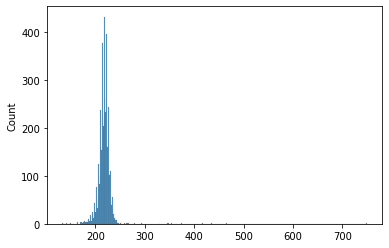

In [ ]:
# Plotting a historgram


### Quality Plot based on PHRED-Score

The following code creates a box plot of the PHRED-Scores over the position of the base in the reads. 

✍️ **Task**

Given this plot. How du You jugdge the overall quality of the reads? Is this a typical plot for MiSeq?

In [ ]:
# Code taken from
# https://dmnfarrell.github.io/python/fastq-quality-python

import os
import math
import pylab as plt
import numpy as np
import pandas as pd
import matplotlib.patches as patches

def plot_fastq_qualities(fataq_records, ax=None, limit=10000):

    res=[]
    c=0
    for record in fataq_records:
        score=record.letter_annotations["phred_quality"]
        res.append(score)
        c+=1
        if c>limit:
            break
    df = pd.DataFrame(res)
    l = len(df.T)+1

    if ax==None:
        f,ax=plt.subplots(figsize=(24,5))
    rect = patches.Rectangle((0,0),l,20,linewidth=0,facecolor='r',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,20),l,8,linewidth=0,facecolor='yellow',alpha=.4)
    ax.add_patch(rect)
    rect = patches.Rectangle((0,28),l,12,linewidth=0,facecolor='g',alpha=.4)
    ax.add_patch(rect)
    df.mean().plot(ax=ax,c='black')
    boxprops = dict(linestyle='-', linewidth=1, color='black')
    df.plot(kind='box', ax=ax, grid=False, showfliers=False,
            color=dict(boxes='black',whiskers='black')  )
    ax.set_xticks(np.arange(0, l, 5))
    ax.set_xticklabels(np.arange(0, l, 5))
    ax.set_xlabel('position(bp)')
    ax.set_xlim((0,l))
    ax.set_ylim((0,40))
    ax.set_title('per base sequence quality')    
    return

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


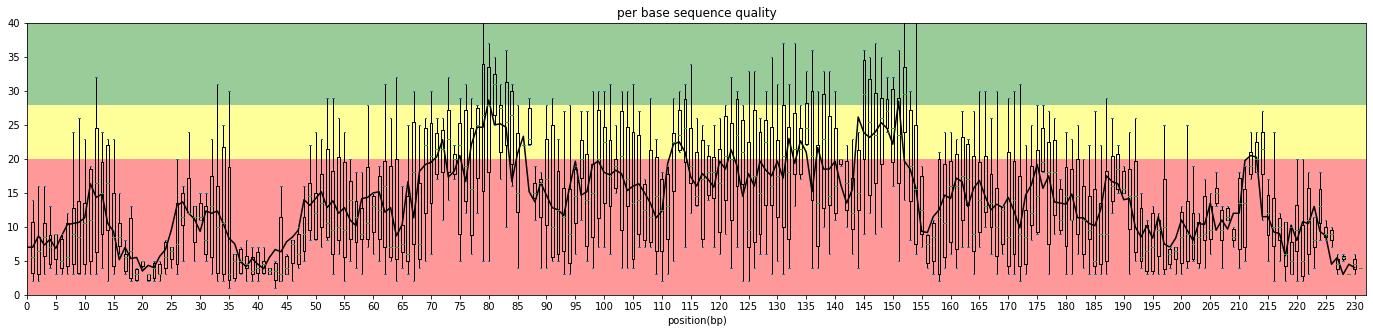

In [ ]:
fastaq_records = SeqIO.parse("1_control_trnL_2019_minq7.fastq", "fastq")
plot_fastq_qualities(fastaq_records, limit=5) 

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Storing FASTAQ-Files in Dictionaries

So far, we just parsed the FASTQ-file any time we want to use the data. Instead, we can also store the data in a Python dictionary so that we do not have to read the file any time we want to use the data:

In [ ]:
fq_dict = SeqIO.index("1_control_trnL_2019_minq7.fastq", "fastq")
len(fq_dict)

4567

The IDs of the records become the keys in the dictionaries.

In [ ]:
list(fq_dict.keys())[0:5]

['83b951be-cf09-402a-8b19-48105583c067',
 'd7d01aba-44d6-456a-a393-8d39c0cc0d58',
 '1f1dd03c-c914-4efc-87c1-593a78e874bd',
 '6b479cc9-2a29-47dd-a50e-02fc02b504f0',
 '684cbdee-2e80-4722-8d22-bafa61989a55']

We can now access the records using the keys:

In [ ]:
type(fq_dict["3fb24bee-35c8-4318-b994-80c1b652e7f3"])

Bio.SeqRecord.SeqRecord

## Sequence Data

Individual sequences work like Strings, but also have some further capabilities:

In [ ]:
a_sequence = fq_dict["3fb24bee-35c8-4318-b994-80c1b652e7f3"].seq

In [ ]:
type(a_sequence)

Bio.Seq.Seq

In [ ]:
a_sequence

Seq('GGTAATAGCCCTTCGTTCAGTTTTTCAGAGGTGGGTGTTTATGATCTGTCGCTA...ATC')

You can create the complementing sequence:

In [ ]:
a_sequence.complement()

Seq('CCATTATCGGGAAGCAAGTCAAAAAGTCTCCACCCACAAATACTAGACAGCGAT...TAG')

And the reverse complement:

In [ ]:
a_sequence.reverse_complement()

Seq('GATATGTTGTCGGTGTCTTTGTGACTCTGCCTGTCGCTCTATCTTCAGACAGAG...ACC')

#### Transcription

You can also got the full way from the coding DNA-Stand to the messenger RNA.

![](https://cdn.kastatic.org/ka-perseus-images/20ce29384b2e7ff0cdea72acaa5b1dbd7287ab00.png)

In [ ]:
coding_dna = a_sequence
template_dna = coding_dna.reverse_complement()
messenger_rna = coding_dna.transcribe()
messenger_rna

Seq('GGUAAUAGCCCUUCGUUCAGUUUUUCAGAGGUGGGUGUUUAUGAUCUGUCGCUA...AUC')

#### Translation

And translate the messenger RNA to a protein.

✍️ **Task**

How do You interpret the following warning message?

In [ ]:
messenger_rna.translate()

/usr/local/lib/python3.7/dist-packages/Bio/Seq.py:2983: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  BiopythonWarning,


Seq('GNSPSFSFSEVGVYDLSLP*QKVVRCLCVSVVADIAEIGKTLRT*NPPS*MRVQ...TTY')

In [ ]:
# direct translation form the coding DNA
coding_dna.translate()

Seq('GNSPSFSFSEVGVYDLSLP*QKVVRCLCVSVVADIAEIGKTLRT*NPPS*MRVQ...TTY')

# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

## Alignments

Biopython also provides some simple alignment algorithms You can use for lists of Sequence Records:

### Pairwise Alignment

The ```PairwiseAligner``` takes two sequences and results in a list of possible alignments:


In [ ]:
from Bio import Align
aligner = Align.PairwiseAligner()
seq1 = "GAACT"
seq2 = "GAT"
alignments = aligner.align(seq1, seq2)


In [ ]:
print(alignments[0])
print(alignments[0].score)

GAACT
||--|
GA--T

3.0


In [ ]:
print(alignments[1])
print(alignments[1].score)

GAACT
|-|-|
G-A-T

3.0


# 🏁 Recap

- If you have finished the tasks and have no questions, place the green card on top.
- If you have finished the tasks but would like to discuss the solutions together again, place the yellow card on top.

![](https://www.lokalinfo.ch/fileadmin/news_import/image003_03.jpg)

### Multiple Aligments

[Multiple Aligments](https://biopython-cn.readthedocs.io/zh_CN/latest/en/chr06.html) are computantionally very expensive and the algorithms are often implemented in more efficent programming languages than Python.





You can store and manipulate results of multiple aligments. This only works for multiple sequences of the same length. You can fill-up unknown bases with `_`: 

In [ ]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Align import MultipleSeqAlignment
align1 = MultipleSeqAlignment(
     [
         SeqRecord(Seq("ACTGCTAGCTAG"), id="Alpha"),
         SeqRecord(Seq("ACT-CTAGCTAG"), id="Beta"),
         SeqRecord(Seq("ACTGCTAGDTAG"), id="Gamma"),
         SeqRecord(Seq("___GTCAGC-AG"), id="Delta")
     ]
 )
align2 = MultipleSeqAlignment(
     [

         SeqRecord(Seq("GACAGCTAG"), id="Epsilon"),
         SeqRecord(Seq("GTCAGCTAG"), id="Zeta")
     ]
 )
align3 = MultipleSeqAlignment(
     [
         SeqRecord(Seq("ACTAGTACAGCTG"), id="Eta"),
         SeqRecord(Seq("ACTAGTACAGCT-"), id="Theta"),
         SeqRecord(Seq("-CTACTACAGGTG"), id="Iota"),
     ]
 )
my_alignments = [align1, align2, align3]

In [ ]:
print(align1)

Alignment with 4 rows and 12 columns
ACTGCTAGCTAG Alpha
ACT-CTAGCTAG Beta
ACTGCTAGDTAG Gamma
___GTCAGC-AG Delta


The PHYLIP file format is a typical format to store results of a multiple sequence alignment. The format was originally defined and used in Joe Felsenstein’s PHYLIP package, and has since been supported by several other bioinformatics tools

The header consists of a single line describing the dimensions of the alignment. It must be the first line in the file. The header consists of optional spaces, followed by two positive integers (n and m) separated by one or more spaces. The first integer (n) specifies the number of sequences (i.e., the number of rows) in the alignment. The second integer (m) specifies the length of the sequences (i.e., the number of columns) in the alignment
[1](http://scikit-bio.org/docs/0.2.2/generated/skbio.io.phylip.html)

In [ ]:
# Writing a phylip file
from Bio import AlignIO
AlignIO.write(my_alignments, "my_example.phy", "phylip")

3

```
 3 12
Alpha      ACTGCTAGCT AG
Beta       ACT-CTAGCT AG
Gamma      ACTGCTAGDT AG
 3 9
Delta      GTCAGC-AG
Epsilon    GACAGCTAG
Zeta       GTCAGCTAG
 3 13
Eta        ACTAGTACAG CTG
Theta      ACTAGTACAG CT-
Iota       -CTACTACAG GTG
```



🏆 **Task**

The following DNA samples encode the *pB1 Protein* of different influenza viruses. We want to find out, which of the three samples is different from the other two as it is an influenza viruses infects another species than the other two.

The data stems from the 
[US National Center for Biotechnology Information](https://www.ncbi.nlm.nih.gov/genomes/FLU/Database/nph-select.cgi#mainform)

Use a Multiple Sequence Alignment from the [EBI Webtool](https://www.ebi.ac.uk/Tools/services/web_clustalo/toolform.ebi) two answer the question.

*Hint*: You can use Clustal Omega. Look into the Guide tree in the results to find the answer.


```
> M25925 
AGCAAAAGCAGGCAAACCATTTGAATGGATGTCAATCCGACTTTACTTTTCTTGAAAGTTCCAGCGCAAAATGCCATAAGCACCACATTCCCATATACTGGAGATCCTCCATACAGCCATGGAACGGGAACAGGATACACCATGGACACAGTCAACAGAACACATCAATATTCAGAAAAGGGGAAATGGACAACAAACACAGAAACTGGAGCACCCCAACTTAACCCAATTGATGGACCATTACCTGAGGATAATGAGCCAAGTGGATATGCACAAACAGACTGTGTCCTGGAAGCAATGGCTTTCCTTGAAGAGTCCCACCCAGGAATCTTTGAAAACTCGTGTCTTGAAACGATGGAAGTTGTTCAACAAACAAGAGTGGACAAGCTGACCCAAGGTCGCCAGACCTATGATTGGACATTAAACAGGAATCAGCCGGCTGCAACTGCATTAGCTAATACTATAGAGGTCTTCAGATCGAACGGTTTAACGGCTAATGAATCAGGAAGGCTAATAGATTTCCTCAAGGATGTGATGGAATCAATGGATAAAGAGGAAATGGAAATAACAACGCACTTTCAAAGAAAAAGAAGGGTAAGGGACAACATGACCAAGAAAATGGTCACACAAAGAACAATAGGAAAGAAGAAACAGAGACTAAACAAGAGAAGCTATCTAATAAGAGCATTGACACTGAACACAATGACAAAAGACGCTGAAAGAGGCAAATTAAAGAGAAGAGCAATTGCAACACCTGGGATGCAAATCAGAGGATTTGTGTATTTTGTTGAAACATTAGCGAGGAGCATCTGTGAGAAGCTTGAACAATCTGGACTTCCAGTTGGAGGCAATGAAAAGAAGGCTAAACTGGCAAATGTTGTGAGAAAAATGATGACTAATTCACAAGACACAGAGCTCTCTTTCACAATCACTGGAGACAACACCAAATGGAATGAAAATCAGAACCCTAGGATGTTCCTGGCAATGATAACATACATAACAAGAAATCAACCTGAATGGTTTAGGAATGTCTTGAGTATTGCACCTATAATGTTCTCGAATAAAATGGCAAGGCTAGGAAAAGGATACATGTTCGAAAGTAAGAGCATGAAGCTTCGAACACAGATACCAGCAGAAATGTTAGCAAATATTGACCTGAAATATTTCAATGAGTCAACAAGAAAGAAAATAGAGAAGATAAGGCCTCTTCTAATAGATGGTACAGCTTCATTGAGTCCTGGAATGATGATGGGCATGTTCAACATGCTAAGTACAGTTTTAGGAGTCTCAATCCTAAATCTAGGACAAAAGAGGTACACCAAAACAACATACTGGTGGGACGGACTCCAATCCTCTGATGACTTTGCTCTCATAGTGAATGCACCGAATCATGAGGGAATACAAGCAGGAGTAGATAGATTCTATAGGACCTGCAAGCTAGTCGGAATCAATATGAGCAAAAAGAAGTCCTACATAAACAGGACAGGAACATTTGAATTCACAAGCTTTTTCTATCGCTATGGATTTGTAGCCAATTTTAGCATGGAGCTGCCCAGCTTTGGAGTGTCTGGGATTAATGAATCGGCTGACATGAGCATTGGAGTAACAGTGATAAAGAACAACATGATAAACAATGACCTTGGACCAGCAACGGCTCAAATGGCTCTTCAGCTGTTCATCAAGGATTACAGATACACGTATCGGTGTCACAGAGGGGACACACAAATTCAGACGAGGAGGTCATTCGAACTGAAAAAGTTGTGGGAACAAACCCGCTCAAAGGCAGGACTGCTGGTTTCAGATGGAGGACCAAACTTATACAATATCCGTAATCTCCACATCCCGGAAGTCTGCCTGAAATGGGAGCTAATGGACGAAGACTATCAGGGAAGGCTTTGTAACCCCCTGAACCCATTTGTCAGCCATAAGGAGATAGAGTCTGTAAACAATGCTGTGGTGATGCCAGCTCATGGCCCAGCCAAGAACATGGAATATGATGCTGTTGCTACTACACACTCCTGGATCCCTAAGAGGAACCGCTCCATCCTCAACACAAGCCAAAGGGGAATCCTTGAGGACGAACAGATGTATCAAAAGTGCTGCAATCTATTTGAGAAATTCTTCCCTAGCAGTTCATACAGGAGACCGGTTGGGATTTCCAGCATGGTGGAGGCCATGGTGTCTAGGGCCCGAATTGATGCACGAATTGACTTCGAGTCTGGACGGATTAAGAAGGAGGAGTTTGCTGAGATCATGAAGATCTGTTCCACCATTGAAGAGCTCAGACGGCAGAAATAGTGAATTTAGCTTGTCCTTCATGAAAAAATGCCTTGTTTCTACT
> M25926
AGCAAAAGCAGGCAAACCATTTGAATGGATGTCAATCCGACCTTACTTTTCTTGAAAGTTCCAGCACAAAATGCCATAAGCACCACATTCCCGTACACTGGAGATCCTCCATACAGCCATGGGACGGGGACAGGATACACCATGGACACAGTCAACAGAACACATCAATATTCAGAAAAGGGGAAATGGACCACAAACACAGAAACTGGAGCGCCCCAACTTAACCCAATTGATGGACCATTACCTGAGGATAATGAACCAAGTGGATATGCACAAACAGACTGCGTCCTGGAAGCAATGGCTTTCCTTGAAGAATCCCACCCAGGAATCTTTGAAAACTCGTGTCTTGAAACGATGGAAGTTGTTCAACAAACAAGAGTGGACAAGCTGACCCAAGGTCGCCAGACCTATGATTGGACATTAAACAGGAATCAGCCAGCTGCAACTGCATTAGCCAATACTATAGAGGTCTTCAGATCGAACGGTTTAACAGCTAATGAATCGGGAAGGCTAATCGATTTCCTCAAGGATGTGATGGAATCAATGGATAAAGAGGAAATGGAAATAACAACGCACTTCCAAAGAAAAAGAAGGGTGAGAGACAACATGACCAAGAAAATGGTCACACAAAGAACAATAGGAAAGAAGAAGCAGAGATTAAACAAGAGAAGCTATCTAATAAGAGCATTGACATTAAACACAATGACAAAAGATGCTGAAAGAGGCAAATTAAAGAGAAGAGCAATTGCAACACCCGGGATGCAAATCAGAGGATTTGTGTATTTTGTTGAAACACTAGCAAGGAGCATTTGTGAGAAGCTCGAGCAATCTGGACTTCCAGTTGGAGGCAATGAAAAGAAGGCTAAACTGGCAAATGTCGTGAGAAAGATGATGACTAATTCACAAGACACAGAGCTCTCTTTCACAATCACTGGAGACAACACCAAATGGAATGAAAATCAAAACCCTCGAATGTTCCTGGCAATGATAACATACATAACAAGAAATCAACCTGAATGGTTTAGAAATGTTTTGAGCATTGCACCTATAATGTTCTCGAATAAAATGGCAAGACTAGGAAAAGGATACATGTTCGAAAGCAAGAGCATGAAGCTTCGAACACAGATACCAGCAGAAATGCTAGCAGATATTGATCTGAAATATTTCAATGAATCAACAAGAAAGAAAATCGAGAAGATAAGACCTCTTCTAATAGATGGTACAGCCTCATTGAGTCCTGGAATGATGATGGGCATGTTCAATATGCTAAGTACGGTCTTAGGAGTCTCAATCCTAAATCTAGGACAAAAGAGATACACCAAAACAACATATTGGTGGGACGGACTCCAATCCTCTGATGACTTTGCTCTCATAGTGAATGCACCGAATCATGAGGGAATACAAGCAGGGGTAGATAGATTCTATAGAACCTGCAAGCTAGTCGGAATCAATATGAGCAAAAAGAAGTCCTACATAAACAGAACAGGAACATTTGAATTCACAAGCTTTTTCTATCGCTATGGATTTGTAGCCAATTTTAGCATGGAGCTGCCCAGCTTTGGAGTGTCTGGGATTAATGAATCGGCTGACATGAGCATTGGAGTAACAGTGATAAAGAACAACATGATAAATAATGACCTTGGGCCAGCAACAGCTCAAATGGCTCTTCAGCTATTCATCAAAGATTACAGATATACGTATCGATGCCACAGAGGGGACACACAAATTCAGACAAGGAGGTCATTCGAGCTAAAGAAGTTGTGGGAACAAACCCGCTCAAAGGCAGGACTGCTGGTTTCAGATGGAGGACCAAATTTATACAATATCCGGAATCTCCACATCCCGGAAGTCTGCTTGAAATGGGAGCTAATGGACGAAGACTATCAGGGGAGGCTTTGTAATCCCCTGAATCCATTTGTCAGCCATAAGGAAATAGAGTCTGTAAACAATGCTGTGGTAATGCCAGCTCATGGCCCAGCCAAGAGCATGGAATATGATGCTGTTGCTACTACACACTCCTGGATCCCTAAGAGGAACCGCTCCATTCTCAACACAAGCCAAAGGGGAATCCTTGAAGATGAACAGATGTATCAAAAGTGTTGCAATCTATTCGAGAAATTCTTCCCTAGCAGTTCATACAGGAGACCGGTTGGGATTTCCAGCATGGTGGAGGCCATGGTGTCTAGGGCCCGAATTGATGCGCGGATTGACTTCGAATCTGGACGGATTAAGAAAGAGGAGTTCGCTGAGATCATGAAGATCTGTTCCACCATTGAAGAGCTCAGACGGCAGAAATAGTGAATTTAGCTTGTCCTTCATGAAAAAATGCCTTGTTTCTACT
> MT058709
CAAACCATTTGAATGGATGTCAATCCGACTCTACTTTTCCTAAAAATTCCAGCACAAAATGCCATAAGCACCACATTCCCTTATACTGGAGATCCTCCATACAGCCATGGAACAGGAACAGGATACACCATGGACACAGTAAACAGAACACACCAATACTCAGAAAAGGGGAAGTGGACAACAAACACAGAGACTGGTGCACCCCAGCTCAACCCGATTGACGGACCACTACCTGAAGATAATGAACCAAGTGGGTATGCACAAACAGACTGTGTTCTAGAGGCTATGGCTTTCCTTGAAGAATCCCATCCAGGAATATTTGAAAATTCATGCCTTGAAACAATGGAAGTTGTTCAACAAACAAGGGTAGATAAACTGACTCAAGGTCGCCAGACTTATGATTGGACATTAAACAGAAATCAACCGGCAGCAACTGCATTGGCCAACACCATAGAAGTTTTCAGATCGAATGACCTAACAGCTAACGAGTCAGGAAGGCTAATAGATTTCTTAAAGGATGTGATGGAATCAATGAACAAAGAGGAAATAGAGATAACAACCCACTTTCAAAGAAAAAGGAGAGTAAGAGACAACATGACCAAGAAGATGATCACGCAAAGAACAATAGGGAAGAAAAAACAGAGACTGAATAAGAGAGGCTATCTAATAAGAGCACTGACATTAAATACGATGACCAAAGATGCAGAGAGAGGCAAGTTAAAAAGAAGGGCTATCGCAACACCTGGGATGCAGATTAGAGGTTTCGTATACTTTGTTGAAACTTTAGCTAGGAGCATTTGCGAAAAGCTTGAACAGTCTGGGCTCCCAGTAGGGGGCAATGAAAAGAAGGCCAAATTGGCAAATGTTGTGAGAAAGATGATGACTAATTCACAAGATACAGAGATTTCTTTCACAATCACTGGGGACAACACTAAATGGAATGAGAATCAAAATCCTCGAATGTTCCTGGCGATGATTACATATATCACCAGAAATCAACCCGAGTGGTTTAGAAACATCCTGAGCATGGCACCCATAATGTTCTCAAATAAAATGGCAAGACTAGGGAAAGGGTACATGTTCGAGAGTAAAAGAATGAAGATTCGAACACAAATACCAGCAGAAATGCTAGCAAGCATTGATCTAAAGTATTTCAATGAATCAACAAGGAAGAAAATTGAGAAGATAAGGCCTCTTTTAATGGATGGCACAGCATCACTGAGTCCTGGGATGATGATGGGCATGTTCAACATGCTAAGTACTGTCTTGGGAGTCTCGATACTGAATCTTGGACAAAAGAAATACACCAAGACAACATACTGGTGGGATGGGCTTCAATCATCCGACGATTTTGCTCTCATAGTGAATGCACCAAACCATGAAGGAATACAAGCAGGAGTGGACAGATTCTACAGGACCTGCAAATTAGTGGGAATCAACATGAGCAAAAAGAAGTCCTATATAAATAAGACAGGGACATTTGAATTCACAAGCTTTTTTTATCGCTATGGATTTGTGGCTAATTTTAGCATGGAGCTACCCAGCTTTGGAGTGTCTGGAGTAAATGAATCAGCTGACATGAGTATTGGAGTAACAGTGATAAAGAACAACATGATAAACAATGACCTTGGACCTGCAACGGCTCAGATGGCTCTTCAATTGTTCATCAAAGACTACAGATACACATATAGATGTCATAGGGGAGACACACAAATTCAGACGAGAAGATCATTTGAGTTGAAGAAGCTATGGGATCAAACCCAATCAAAGGTAGGGCTATTAGTATCAGATGGAGGACCAAACTTATACAACATACGGAATCTTCACATTCCTGAAGTCTGCTTAAAATGGGAGCTAATGGATGATGATTATCGGGGAAGACTTTGTAATCCCCTGAATCCCTTTGTGAGTCATAAGGAGATTGATTCTGTAAACAATGCTGTGGTAATGCCAGCCCATGGCCCAGCCAAAAGCATGGAATATGATGCCGTCGCTACTACACATTCCTGGATTCCCAAGAGGAATCGTTCTATTCTCAACACAAGCCAAAGGGGAATTCTTGAGGATGAACAGATGTACCAGAAGTGTTGCAATTTATTCGAGAAATTTTTCCCTAGCAGTTCATATAGGAGGCCGGTTGGAATTTCTAGCATGGTGGAGGCCATGGTGTCTAGGGCCCGGATTGATGCCAGAGTCGACTTTGAGTCTGGACGGATTAAGAAAGAAGAGTTCTCTGAGATCATGAAGATCTGTTCCACCATTGAAGAACTCAGACGGCAAAAATAATGAATTTAACTTGTCCTTCATGAAAAAATG
```